# 구글 드라이브 연결

In [1]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 라이브러리 불러오기

In [2]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# 데이터프레임으로 저장

In [3]:
# read xlsx to dataframe from path
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/AI/pone.0197032.s001.xlsx')

df

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,Plt,BUN,Cre,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,23.2,17.0,1.69,29.0,48.0,506.0,17.4,1.0,NaN,NaN
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,24.3,23.1,3.08,36.0,35.0,883.0,0.46,1.0,NaN,NaN
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,31.2,19.4,1.42,33.0,16.0,815.0,0.16,1.0,NaN,NaN
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,33.3,32.9,4.20,33.0,54.0,173.0,1,1.0,NaN,NaN
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,14.1,21.0,1.33,77.0,36.0,386.0,0.103,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,26.1,33.4,1.41,104.0,46.0,3836.0,3.7,1.0,1.0,0.0
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,25.4,63.6,2.01,37.0,19.0,1606.0,1.29,1.0,1.0,1.0
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,8.9,31.5,2.25,140.0,53.0,4388.0,10.74,1.0,1.0,0.0
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,20.2,15.2,0.96,20.0,11.0,61.0,0.06,1.0,1.0,0.0


In [4]:
raw = df.copy()

# 컬럼명 출력

In [5]:
# print columns of raw
raw.columns

Index(['Sex_1male_2female', 'Age', 'Weather_1sunny_2cloudy_3rainy_4missing',
       'Location_1outdoor_indoor', 'Functionaldependency_1notdisable_2disable',
       'HT', 'HeartDisease', 'Pscyco', 'DM', 'CerevD', 'ParkinD', 'CKD',
       'Dementia', 'PreSBP', 'PreRR', 'PreGCSlessthan15', 'PreBT', 'PreHR',
       'Abdminal', 'Muscular', 'GCS', 'SBP', 'BT', 'HR', 'WBC', 'Ht', 'Plt',
       'BUN', 'Cre', 'AST', 'ALT', 'CK', 'CRP', 'Admission1', 'ICU',
       'Deadtodischarge'],
      dtype='object')

# 타겟 생성

In [6]:
# 타겟 생성 (Admission1, ICU, 사망 중 하나라도 1이면 위험)
raw['target'] = (
    (raw['Admission1'] == 1) |
    (raw['ICU'] == 1) |
    (raw['Deadtodischarge'] == 1)
).astype(int)

In [7]:
raw

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,BUN,Cre,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge,target
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,17.0,1.69,29.0,48.0,506.0,17.4,1.0,NaN,NaN,1
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,23.1,3.08,36.0,35.0,883.0,0.46,1.0,NaN,NaN,1
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,19.4,1.42,33.0,16.0,815.0,0.16,1.0,NaN,NaN,1
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,32.9,4.20,33.0,54.0,173.0,1,1.0,NaN,NaN,1
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,21.0,1.33,77.0,36.0,386.0,0.103,1.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,33.4,1.41,104.0,46.0,3836.0,3.7,1.0,1.0,0.0,1
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,63.6,2.01,37.0,19.0,1606.0,1.29,1.0,1.0,1.0,1
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,31.5,2.25,140.0,53.0,4388.0,10.74,1.0,1.0,0.0,1
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,15.2,0.96,20.0,11.0,61.0,0.06,1.0,1.0,0.0,1


# 라벨이 전부 결측(NaN)인 행 제거

In [8]:
mask_all_missing = raw[['Admission1','ICU','Deadtodischarge']].isna().all(axis=1)
raw = raw[~mask_all_missing]

In [9]:
raw

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,BUN,Cre,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge,target
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,17.0,1.69,29.0,48.0,506.0,17.4,1.0,NaN,NaN,1
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,23.1,3.08,36.0,35.0,883.0,0.46,1.0,NaN,NaN,1
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,19.4,1.42,33.0,16.0,815.0,0.16,1.0,NaN,NaN,1
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,32.9,4.20,33.0,54.0,173.0,1,1.0,NaN,NaN,1
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,21.0,1.33,77.0,36.0,386.0,0.103,1.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,33.4,1.41,104.0,46.0,3836.0,3.7,1.0,1.0,0.0,1
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,63.6,2.01,37.0,19.0,1606.0,1.29,1.0,1.0,1.0,1
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,31.5,2.25,140.0,53.0,4388.0,10.74,1.0,1.0,0.0,1
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,15.2,0.96,20.0,11.0,61.0,0.06,1.0,1.0,0.0,1


In [10]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3028 entries, 0 to 3174
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sex_1male_2female                          2995 non-null   float64
 1   Age                                        3021 non-null   float64
 2   Weather_1sunny_2cloudy_3rainy_4missing     2519 non-null   float64
 3   Location_1outdoor_indoor                   1760 non-null   float64
 4   Functionaldependency_1notdisable_2disable  2701 non-null   float64
 5   HT                                         3028 non-null   int64  
 6   HeartDisease                               3028 non-null   int64  
 7   Pscyco                                     3028 non-null   int64  
 8   DM                                         3028 non-null   int64  
 9   CerevD                                     3028 non-null   int64  
 10  ParkinD                      

In [11]:
# Age 결측치 보완
raw['Age'] = pd.to_numeric(raw['Age'], errors='coerce')
raw['Age'] = raw['Age'].fillna(raw['Age'].median())

# HR 결측치 제거
raw['HR'] = pd.to_numeric(raw['HR'], errors='coerce')
raw = raw.dropna(subset=['HR'])

/tmp/ipython-input-1699054825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['Age'] = pd.to_numeric(raw['Age'], errors='coerce')
/tmp/ipython-input-1699054825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['Age'] = raw['Age'].fillna(raw['Age'].median())
/tmp/ipython-input-1699054825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

# 학습용 피처 생성 (나이별 최대 심박수)

In [12]:
raw['HRmax'] = 220 - raw['Age']            # 나이별 최대 심박수
raw['hr_ratio'] = raw['HR'] / raw['HRmax'] # 최대 심박수 대비 현재 심박수 비율

/tmp/ipython-input-839555144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['HRmax'] = 220 - raw['Age']            # 나이별 최대 심박수
/tmp/ipython-input-839555144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['hr_ratio'] = raw['HR'] / raw['HRmax'] # 최대 심박수 대비 현재 심박수 비율


In [13]:
raw

,Sex_1male_2female,Age,Weather_1sunny_2cloudy_3rainy_4missing,Location_1outdoor_indoor,Functionaldependency_1notdisable_2disable,HT,HeartDisease,Pscyco,DM,CerevD,...,AST,ALT,CK,CRP,Admission1,ICU,Deadtodischarge,target,HRmax,hr_ratio
0,1.0,24.0,3.0,NaN,1.0,0,0,0,0,0,...,29.0,48.0,506.0,17.4,1.0,NaN,NaN,1,196.0,0.637755
1,NaN,43.0,NaN,1.0,NaN,0,0,0,0,0,...,36.0,35.0,883.0,0.46,1.0,NaN,NaN,1,177.0,0.491525
2,1.0,58.0,NaN,1.0,1.0,0,0,0,0,0,...,33.0,16.0,815.0,0.16,1.0,NaN,NaN,1,162.0,0.654321
3,1.0,46.0,1.0,1.0,1.0,0,0,0,0,0,...,33.0,54.0,173.0,1,1.0,NaN,NaN,1,174.0,0.609195
4,1.0,57.0,1.0,1.0,1.0,0,0,0,0,0,...,77.0,36.0,386.0,0.103,1.0,1.0,NaN,1,163.0,0.926380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,1.0,54.0,NaN,NaN,1.0,0,0,0,0,0,...,104.0,46.0,3836.0,3.7,1.0,1.0,0.0,1,166.0,0.759036
3171,1.0,62.0,3.0,NaN,2.0,0,0,0,0,0,...,37.0,19.0,1606.0,1.29,1.0,1.0,1.0,1,158.0,0.936709
3172,0.0,80.0,1.0,NaN,1.0,0,1,0,1,0,...,140.0,53.0,4388.0,10.74,1.0,1.0,0.0,1,140.0,1.000000
3173,1.0,84.0,2.0,NaN,2.0,1,0,0,0,0,...,20.0,11.0,61.0,0.06,1.0,1.0,0.0,1,136.0,0.941176


# 학습용 피처 선택 (라벨과 관계 없는 컬럼 제외)

In [14]:
feature_cols = ['Age', 'HR', 'HRmax', 'hr_ratio']
X = raw[feature_cols]
y = raw['target']

In [15]:
X

,Age,HR,HRmax,hr_ratio
0,24.0,125.0,196.0,0.637755
1,43.0,87.0,177.0,0.491525
2,58.0,106.0,162.0,0.654321
3,46.0,106.0,174.0,0.609195
4,57.0,151.0,163.0,0.926380
...,...,...,...,...
3170,54.0,126.0,166.0,0.759036
3171,62.0,148.0,158.0,0.936709
3172,80.0,140.0,140.0,1.000000
3173,84.0,128.0,136.0,0.941176


# 데이터 분할 Train / Test split

In [16]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 및 평가

In [18]:
#!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


[LightGBM] [Info] Number of positive: 908, number of negative: 1286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 2194, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413856 -> initscore=-0.348048
[LightGBM] [Info] Start training from score -0.348048
=== LightGBM ===
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       333
           1       0.67      0.53      0.59       216

    accuracy                           0.71       549
   macro avg       0.70      0.68      0.69       549
weighted avg       0.71      0.71      0.71       549



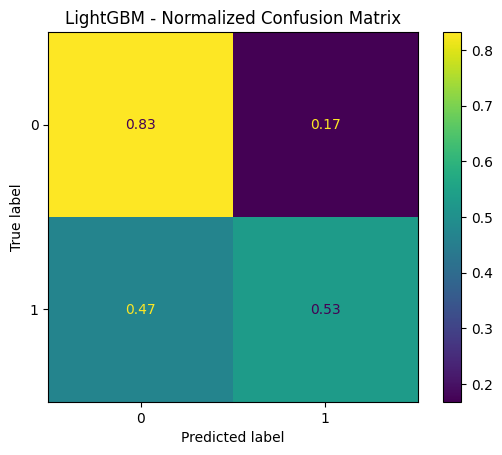

=== RandomForest ===
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       333
           1       0.60      0.55      0.57       216

    accuracy                           0.68       549
   macro avg       0.66      0.66      0.66       549
weighted avg       0.67      0.68      0.68       549



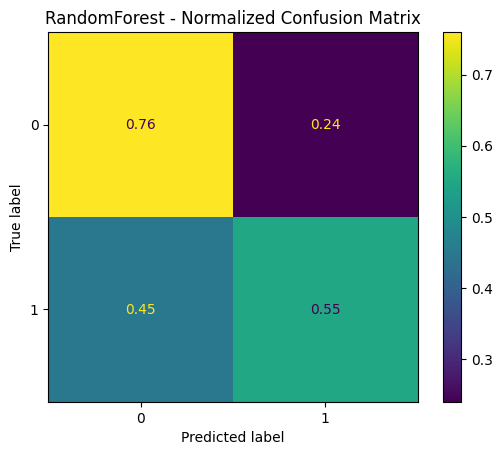

=== XGBoost ===
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       333
           1       0.66      0.56      0.61       216

    accuracy                           0.71       549
   macro avg       0.70      0.69      0.69       549
weighted avg       0.71      0.71      0.71       549



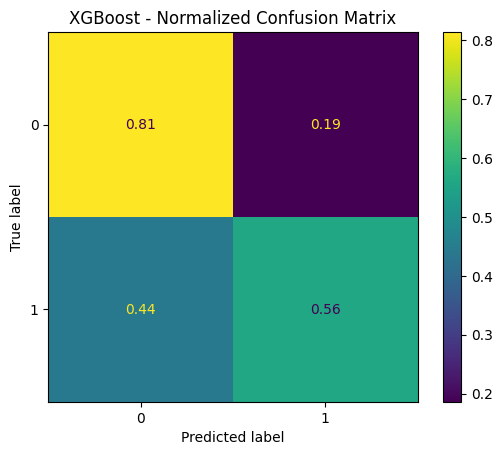

=== CatBoost ===
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       333
           1       0.72      0.52      0.60       216

    accuracy                           0.73       549
   macro avg       0.73      0.69      0.70       549
weighted avg       0.73      0.73      0.72       549



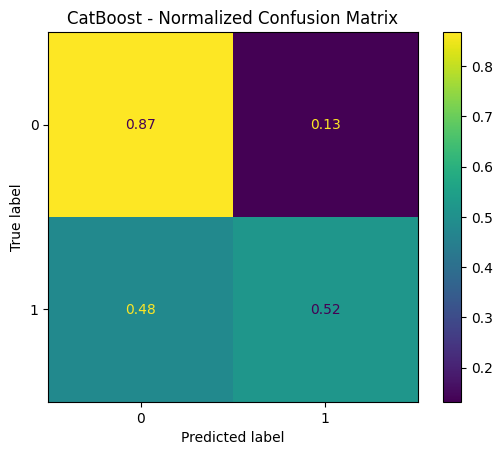

=== LogisticRegression ===
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       333
           1       0.70      0.57      0.63       216

    accuracy                           0.74       549
   macro avg       0.73      0.71      0.71       549
weighted avg       0.73      0.74      0.73       549



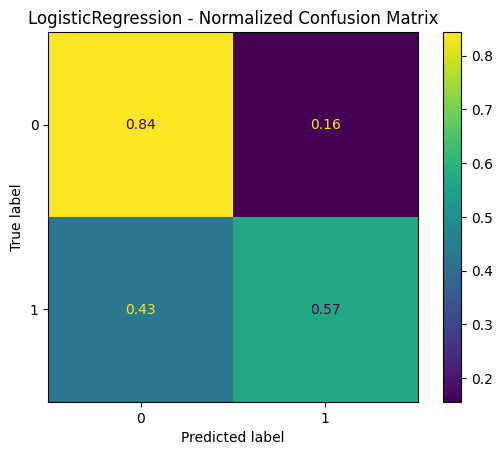

=== SVM ===
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       333
           1       0.77      0.49      0.59       216

    accuracy                           0.74       549
   macro avg       0.75      0.70      0.70       549
weighted avg       0.74      0.74      0.72       549



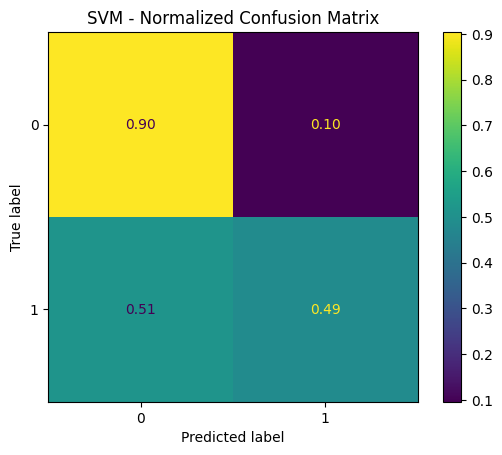

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


models = {
    "LightGBM": lgb.LGBMClassifier(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LogisticRegression": LogisticRegression(max_iter=500),
    "SVM": SVC()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))

    # 혼동행렬 계산
    cm_norm = confusion_matrix(y_test, y_pred, labels=[0,1], normalize='true')

    # 시각화(원하면 주석 해제)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=[0,1])
    disp.plot(values_format='.2f')
    plt.title(f"{name} - Normalized Confusion Matrix")
    plt.show()

# 버전 확인

In [23]:
import pandas as pd
import lightgbm as lgb
import sklearn
import xgboost as xgb
import catboost as cb

print("pandas:", pd.__version__)
print("lightgbm:", lgb.__version__)
print("scikit-learn:", sklearn.__version__)
print("xgboost", xgb.__version__)
print("catboost", cb.__version__)

pandas: 2.2.2
lightgbm: 4.6.0
scikit-learn: 1.6.1
xgboost 3.0.3
catboost 1.2.8
